<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/Titanic%20Dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
!pip install -q kaggle

In [121]:
!mkdir -p ~/.kaggle


In [122]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [123]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [124]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction 

In [227]:
dataset = pd.read_csv("./train.csv")

In [228]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [229]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [230]:
dataset.drop(['Cabin'],inplace = True,axis = 1)

In [231]:
dataset = dataset.dropna()

In [232]:
dataset = dataset.sample(frac = 1)

In [233]:
mean = dataset['Age'].mean()
dataset['Age'] = dataset['Age'].fillna(mean)

In [133]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

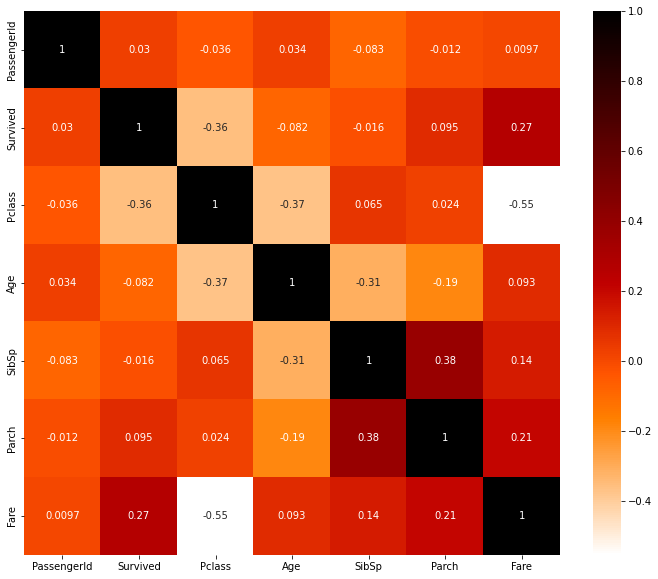

In [134]:
plt.figure(figsize = (12,10))
sns.heatmap(dataset.corr(),cmap = "gist_heat_r",annot = True)

In [135]:
corr_matrix = dataset.corr().abs()
corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dataset.drop(to_drop, axis=1, inplace=True)

In [136]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,0.03,0.04,0.03,0.08,0.01,0.01
Survived,0.03,1.00,0.36,0.08,0.02,0.10,0.27
Pclass,0.04,0.36,1.00,0.37,0.07,0.02,0.55
Age,0.03,0.08,0.37,1.00,0.31,0.19,0.09
SibSp,0.08,0.02,0.07,0.31,1.00,0.38,0.14
Parch,0.01,0.10,0.02,0.19,0.38,1.00,0.21
Fare,0.01,0.27,0.55,0.09,0.14,0.21,1.00


## Model Training

In [137]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.00,1,0,113776,66.60,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.00,1,0,PC 17572,76.73,C
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.00,0,0,250655,26.00,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.65,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.50,S
...,...,...,...,...,...,...,...,...,...,...,...
534,535,0,3,"Cacic, Miss. Marija",female,30.00,0,0,315084,8.66,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.50,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.00,1,5,347082,31.27,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.00,0,1,24160,211.34,S


In [138]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
from lazypredict.Supervised import LazyClassifier

In [234]:
x = dataset.drop(['Survived','PassengerId'],axis = 1)
y = dataset['Survived']

In [141]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
336,1,"Pears, Mr. Thomas Clinton",male,29.00,1,0,113776,66.60,S
645,1,"Harper, Mr. Henry Sleeper",male,48.00,1,0,PC 17572,76.73,C
427,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.00,0,0,250655,26.00,S
699,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.65,S
286,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.50,S
...,...,...,...,...,...,...,...,...,...
534,3,"Cacic, Miss. Marija",female,30.00,0,0,315084,8.66,S
377,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.50,C
610,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.00,1,5,347082,31.27,S
689,1,"Madill, Miss. Georgette Alexandra",female,15.00,0,1,24160,211.34,S


In [235]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Sex'] = encoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = encoder.fit_transform(dataset['Embarked'])

In [236]:
dataset.drop(['Ticket'],inplace = True,axis = 1)

In [237]:
x = dataset.drop(['Survived','Name'],axis = 1)
y = dataset['Survived']

In [188]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
336,337,0,1,"Pears, Mr. Thomas Clinton",1,29.00,1,0,66.60,2
645,646,1,1,"Harper, Mr. Henry Sleeper",1,48.00,1,0,76.73,0
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",0,19.00,0,0,26.00,2
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",1,42.00,0,0,7.65,2
286,287,1,3,"de Mulder, Mr. Theodore",1,30.00,0,0,9.50,2
...,...,...,...,...,...,...,...,...,...,...
534,535,0,3,"Cacic, Miss. Marija",0,30.00,0,0,8.66,2
377,378,0,1,"Widener, Mr. Harry Elkins",1,27.00,0,2,211.50,0
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",0,39.00,1,5,31.27,2
689,690,1,1,"Madill, Miss. Georgette Alexandra",0,15.00,0,1,211.34,2


In [189]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
336,337,1,1,29.00,1,0,66.60,2
645,646,1,1,48.00,1,0,76.73,0
427,428,2,0,19.00,0,0,26.00,2
699,700,3,1,42.00,0,0,7.65,2
286,287,3,1,30.00,0,0,9.50,2
...,...,...,...,...,...,...,...,...
534,535,3,0,30.00,0,0,8.66,2
377,378,1,1,27.00,0,2,211.50,0
610,611,3,0,39.00,1,5,31.27,2
689,690,1,0,15.00,0,1,211.34,2


In [238]:
x['Age'] = (x['Age'] - x['Age'].min()) / (x['Age'].max() - x['Age'].min())
x['Fare'] = (x['Fare'] - x['Fare'].min()) / (x['Fare'].max() - x['Fare'].min())


In [239]:
x.drop(['PassengerId'],axis = 1,inplace = True)

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)

In [193]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_val, y_train, y_val)

100%|██████████| 29/29 [00:01<00:00, 26.21it/s]


In [150]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.80,0.79,0.79,0.80,0.04
QuadraticDiscriminantAnalysis,0.79,0.78,0.78,0.79,0.01
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.10
NuSVC,0.78,0.77,0.77,0.78,0.04
SVC,0.79,0.77,0.77,0.78,0.02
KNeighborsClassifier,0.78,0.76,0.76,0.78,0.02
DecisionTreeClassifier,0.78,0.76,0.76,0.78,0.01
LGBMClassifier,0.78,0.76,0.76,0.77,0.05
BaggingClassifier,0.78,0.76,0.76,0.77,0.04


In [151]:
x.shape

(712, 8)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
336,1,1,0.36,1,0,27,0.13,2
645,1,1,0.60,1,0,462,0.15,0
427,2,0,0.23,0,0,145,0.05,2
699,3,1,0.52,0,0,286,0.01,2
286,3,1,0.37,0,0,249,0.02,2
...,...,...,...,...,...,...,...,...
534,3,0,0.37,0,0,215,0.02,2
377,1,1,0.33,0,2,21,0.41,0
610,3,0,0.48,1,5,273,0.06,2
689,1,0,0.18,0,1,117,0.41,2


## ANN

In [240]:
import tensorflow as tf


In [241]:
tf.random.set_seed(42)

In [242]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3,mode = "max")

In [243]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2000,input_shape = (7,),),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer = tf.optimizers.Adam(),metrics = ["accuracy"])

In [244]:
model.fit(x,y,epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 5ms/step - loss: 0.6560 - accuracy: 0.6573
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5424 - accuracy: 0.7472
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.7865
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.7612
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7935
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4680 - accuracy: 0.7992
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4825 - accuracy: 0.7795
Epoch 8/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4891 - accuracy: 0.7907
Epoch 9/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5043 - accuracy: 0.7935
Epoch 10/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7570
Epoch 11/

## Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression
lgsmodel = LogisticRegression()
lgsmodel.fit(x,y)

LogisticRegression()

In [246]:
from sklearn.metrics import accuracy_score
accuracy_score(lgsmodel.predict(x_val),y_val)

0.7832167832167832

## XGBoost

In [158]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Hyper Paramteric Tuning

In [247]:
params = {
        'min_child_weight': np.random.randint(1,20,size = 10),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,10]
        }

In [248]:
from xgboost import XGBClassifier
xgbooster =  XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False,
                          learning_rate=0.02, 
                          n_estimators=600,
                          n_threads = 1,
                          silent=True
                           
                          )


### Random Search

In [249]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgbooster, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )

random_search.fit(x,y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe70804e4d0>,
                   estimator=XGBClassifier(eval_metric='auc',
                                           grow_policy='lossguide',
                                           learning_rate=0.02, n_estimators=600,
                                           n_threads=1, silent=True,
                                           tree_method='hist',
                                           use_label_encoder=False),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5, 10],
                                        'min_child_weight': array([13,  8, 14,  8,  7,  5, 18, 11, 14,  1]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

### GridSearch

In [162]:
grid = GridSearchCV(estimator=xgbooster, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3 )
grid.fit(x,y)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fe710087ed0>,
             estimator=XGBClassifier(eval_metric='auc', grow_policy='lossguide',
                                     learning_rate=0.02, n_estimators=600,
                                     n_threads=1, silent=True,
                                     tree_method='hist',
                                     use_label_encoder=False),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'max_depth': [3, 4, 5, 10],
                         'min_child_weight': array([19,  8, 12, 14,  3, 19,  2,  2,  6,  8]),
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=3)

## Predictions

In [250]:
test_dataset = pd.read_csv("./test.csv")

In [251]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [252]:
test_dataset.drop(['Cabin'],axis = 1,inplace = True)

In [253]:
mean = test_dataset['Age'].mean()
test_dataset['Age'] = test_dataset['Age'].fillna(mean)

In [254]:
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].mean())

In [255]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_dataset['Sex'] = encoder.fit_transform(test_dataset['Sex'])
test_dataset['Embarked'] = encoder.fit_transform(test_dataset['Embarked'])
test_dataset['Ticket'] = encoder.fit_transform(test_dataset['Ticket'])

In [256]:
x_test = test_dataset.drop(['PassengerId','Name','Ticket'],axis = 1)

In [257]:
x_test.shape

(418, 7)

In [258]:
x_test['Age'] = (x_test['Age'] - x_test['Age'].min()) / (x_test['Age'].max() - x_test['Age'].min())
x_test['Fare'] = (x_test['Fare'] - x_test['Fare'].min()) / (x_test['Fare'].max() - x_test['Fare'].min())

In [259]:
y_pred = model.predict(x_test) > 0.5

14/14 [==============================] - 0s 2ms/step


In [260]:
y_pred_0 = []
for i in range(len(y_pred)):
  if y_pred[i]:
    y_pred_0.append(1)
  else:
    y_pred_0.append(0)


In [261]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_0}

In [262]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission.csv",index = False)

### XG Predictions

In [177]:
y_pred_xg = xgbooster.predict(x_test)

XGBoostError: ignored

In [ ]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_xg}

In [ ]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_xg.csv",index = False)

### Random Search Prediction

In [263]:
y_pred_random_xg = random_search.predict(x_test)

In [264]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_random_xg}

In [265]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_random_xg.csv",index = False)

### Grid Search Prediction

In [178]:
y_pred_grid_xg = grid.predict(x_test)

In [179]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_random_xg}

In [180]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_random_xg.csv",index = False)